In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
# seir-sei model (prototype)
def seir_sei_model(y, t, beta_hv, sigma_h, gamma_h, mu_h, A, mu_m, beta_vh, sigma_m):
    """
    SEIR-SEI model for a vector-borne disease.

    Parameters:
    - y: A list of compartments [Sh, Eh, Ih, Rh, Sm, Em, Im]
    - t: Time
    - beta_hv: Transmission rate from infectious humans to susceptible vectors.
    - sigma_h: Rate at which exposed humans become infectious.
    - gamma_h: Recovery rate of infectious humans.
    - mu_h: Natural birth/death rate of humans.
    - A: Recruitment rate of new vectors.
    - mu_m: Death rate of vectors.
    - beta_vh: Transmission rate from infectious vectors to susceptible humans.
    - sigma_m: Rate at which exposed vectors become infectious.
    """
    Sh, Eh, Ih, Rh, Sm, Em, Im = y

    # Total populations
    N_h = Sh + Eh + Ih + Rh
    N_m = Sm + Em + Im
    
    # Human (SEIR) equations
    dShdt = mu_h * N_h - beta_hv * Sh * Im / N_h - mu_h * Sh
    dEhdt = (beta_hv * Sh * Im / N_h) - (sigma_h + mu_h) * Eh
    dIhdt = (sigma_h * Eh) - (gamma_h + mu_h) * Ih
    dRhdt = (gamma_h * Ih) - (mu_h * Rh)

    # Vector (SEI) equations
    dSmdt = A - beta_vh * Sm * Ih / N_h - mu_m * Sm
    dEmdt = (beta_vh * Sm * Ih / N_h) - (sigma_m + mu_m) * Em
    dImdt = (sigma_m * Em) - mu_m * Im

    return [dShdt, dEhdt, dIhdt, dRhdt, dSmdt, dEmdt, dImdt]

In [5]:
dengue_cases = pd.read_csv('2023_cases_x_larvae.csv')

beta_hv = 0.5       # Human-to-vector transmission rate
sigma_h = 1/5       # Human incubation period (5 days)
gamma_h = 1/10      # Human infectious period (10 days)
mu_h = 1/(70*365)   # Human life expectancy (70 years)
A = 44.5            # Mosquito recruitment rate
mu_m = 1/14         # Mosquito lifespan (14 days)
beta_vh = 0.5       # Vector-to-human transmission rate
sigma_m = 1/10      # Mosquito incubation period (10 days)

# human cases primary value
N_h =  dengue_cases['Total_Population'].iloc[-1]
I_h0 = dengue_cases['New_cases'].iloc[-1]
E_h0 = 0
R_h0 = dengue_cases['Total_cases'].iloc[-1]
S_h0 = N_h - I_h0 - E_h0 - R_h0

# mosquito primnary value
N_m = dengue_cases['Total_Mosquito_Population'].iloc[-1]
I_m0 = dengue_cases['Total_Mosquito_Population'].iloc[-1] * 44.5
E_m0 = 0
S_m0 = N_m - I_m0 - E_m0

y0 = [S_h0, E_h0, I_h0, R_h0, S_m0, E_m0, I_m0]

# Time vector (e.g., 365 days)
t = np.linspace(0, 100, 101)

# Solve the ODEs
solution = odeint(seir_sei_model, y0, t, args=(beta_hv, sigma_h, gamma_h, mu_h, A, mu_m, beta_vh, sigma_m))

# The solution contains the values for all compartments over time
Sh_sol = solution[:, 0]
Eh_sol = solution[:, 1]
Ih_sol = solution[:, 2]
Rh_sol = solution[:, 3]
Sm_sol = solution[:, 4]
Em_sol = solution[:, 5]
Im_sol = solution[:, 6]

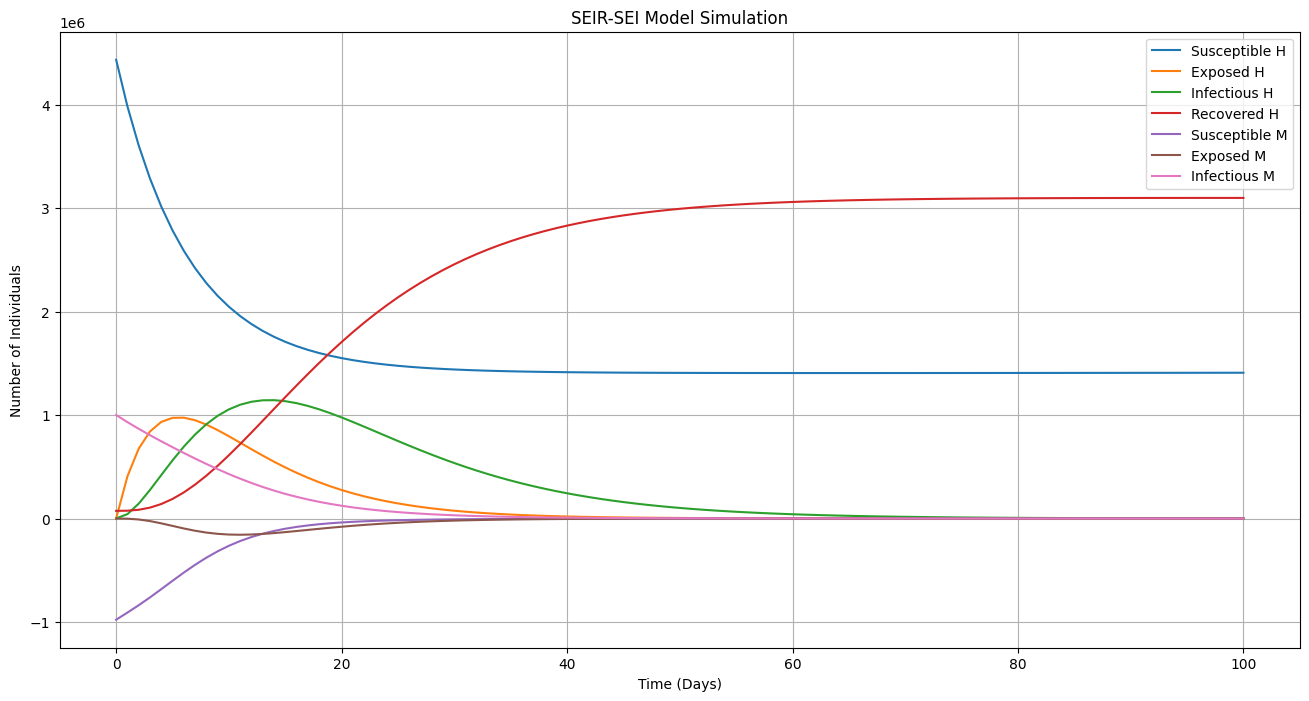

In [4]:
# --- Plot the Results ---
plt.figure(figsize=(16, 8))
plt.plot(t, Sh_sol, label='Susceptible H')
plt.plot(t, Eh_sol, label='Exposed H')
plt.plot(t, Ih_sol, label='Infectious H')
plt.plot(t, Rh_sol, label='Recovered H')
plt.plot(t, Sm_sol, label='Susceptible M')
plt.plot(t, Em_sol, label='Exposed M')
plt.plot(t, Im_sol, label='Infectious M')
plt.xlabel('Time (Days)')
plt.ylabel('Number of Individuals')
plt.title('SEIR-SEI Model Simulation')
plt.legend()
plt.grid(True)
plt.show()